<a href="https://colab.research.google.com/github/CrisMcode111/DI_Bootcamp/blob/main/w5_D5_binary_text_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Daily Challenge: Binary Text Classification with IMDB Dataset (CNN)


🛠️ What you will create
A binary text classification model using the IMDB dataset to classify movie reviews as positive or negative.
A visualization of training and validation loss and accuracy to analyze model performance.


Dataset
The dataset used in this project is the IMDB Movie Reviews Dataset, which contains 50,000 reviews labeled as positive (1) or negative (0). The dataset is preprocessed, with each review encoded as a sequence of integers representing the most frequent 10,000 words in the dataset.

# Task
Load the IMDB dataset from keras library


1. Preprocess the Data:

* Load the IMDB dataset using Keras.
You will notice that the data is a list of integers which we cannot feed into a neural network. We have to turn our lists into tensors.We could one-hot-encode our lists to turn them into vectors of 0s and 1s. Concretely, this would mean for instance turning the sequence. [3,5] into a 10,000-dimensional vector that would be all-zeros except for indices 3 and 5, which would be ones. Then we could use as first layer in our network a Dense layer, capable of handling floating point vector data

* Convert the sequences of integers into binary matrices using one-hot encoding.

* Split the data into training, validation, and test sets.

2. Build the Model:

Our input data is simply vectors, and our labels are scalars (1s and 0s): this is the easiest setup you will ever encounter. A type of network that performs well on such a problem would be a simple stack of fully-connected (Dense) layers with relu activations. We need to pick a loss function and an optimizer. Since we are facing a binary classification problem and the output of our network is a probability (we end our network with a single-unit layer with a sigmoid activation), therefore it is best to use the binary_crossentropy loss.

* Create a feedforward neural network with:
Two hidden layers using ReLU activation.
An output layer with a sigmoid activation for binary classification.
* Compile the model using the RMSprop optimizer, binary cross-entropy loss, and accuracy as the evaluation metric.
3. Train the Model:

* Train the model on the training data for 20 epochs with a batch size of 512.
* Use the validation set to monitor performance during training.
4. Evaluate the Model:

* Plot the training and validation loss and accuracy to detect overfitting.
* Retrain the model with an optimal number of epochs to avoid overfitting.
* Evaluate the final model on the test set to measure its performance.
5. Analyze Results:

* Compare the training and validation metrics to understand the model’s behavior.
* Report the final accuracy and loss on the test set.


1. Preprocess the Data:

Load the IMDB dataset using Keras.

Convert the sequences of integers into binary matrices using one-hot encoding.

Split the data into training, validation, and test sets.

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras


In [3]:
num_words = 10_000  # keep the 10k most frequent tokens

keras.datasets.imdb.load_data(num_words=num_words)


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


((array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
         list([1, 194, 1153, 194, 8255, 78, 

In [5]:
(x_train, y_train), (x_test, y_test) = keras.datasets.imdb.load_data(num_words=num_words)


In [6]:
# Define the vectorization function (one-hot encoding)
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

# Apply the function to training and test data
x_train = vectorize_sequences(x_train)
x_test = vectorize_sequences(x_test)

# Convert labels to float32 (0.0 / 1.0)
y_train = np.asarray(y_train).astype("float32")
y_test = np.asarray(y_test).astype("float32")

# Split training data into training + validation sets
x_val = x_train[:10_000]
partial_x_train = x_train[10_000:]

y_val = y_train[:10_000]
partial_y_train = y_train[10_000:]

print("Training data shape:", partial_x_train.shape)
print("Validation data shape:", x_val.shape)
print("Test data shape:", x_test.shape)

Training data shape: (15000, 10000)
Validation data shape: (10000, 10000)
Test data shape: (25000, 10000)


2. Build the Model:

* Create a feedforward neural network with:
Two hidden layers using ReLU activation.
An output layer with a sigmoid activation for binary classification.
* Compile the model using the RMSprop optimizer, binary cross-entropy loss, and accuracy as the evaluation metric.

In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# for reproducible results
tf.random.set_seed(42)

# Simple MLP for one-hot vectors of size 10,000
model = keras.Sequential([
    layers.Input(shape=(10000,)),  # each review is a 10k vector
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")  # probability (0..1)
])

# RMSprop + binary crossentropy + accuracy
model.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=1e-3),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │       160,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 160,305 (626.19 KB)

 Trainable params: 160,305 (626.19 KB)

 Non-trainable params: 0 (0.00 B)

3. Train the Model:

Train the model on the training data for 20 epochs with a batch size of 512.
Use the validation set to monitor performance during training.

In [8]:
# 3️⃣ Train the model
history = model.fit(
    partial_x_train,       # training data (excluding the 10,000 for validation)
    partial_y_train,
    epochs=20,             # 20 epoch
    batch_size=512,        # batch size
    validation_data=(x_val, y_val),  # we monitor performance on the validation set
    verbose=1              # show training progress
)


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 123ms/step - accuracy: 0.7083 - loss: 0.5911 - val_accuracy: 0.8665 - val_loss: 0.3890
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.8883 - loss: 0.3405 - val_accuracy: 0.8814 - val_loss: 0.3168
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9200 - loss: 0.2484 - val_accuracy: 0.8875 - val_loss: 0.2865
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step - accuracy: 0.9369 - loss: 0.1957 - val_accuracy: 0.8890 - val_loss: 0.2760
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 169ms/step - accuracy: 0.9463 - loss: 0.1613 - val_accuracy: 0.8870 - val_loss: 0.2806
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.9575 - loss: 0.1372 - val_accuracy: 0.8875 - val_loss: 0.2874
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.9617 - loss: 0.1190 - val_accuracy: 0.8857 - val_loss: 0.2972
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.9722 - loss: 0.0987 - val_accuracy: 0.8835 -

4. Evaluate the Model:

* Plot the training and validation loss and accuracy to detect overfitting.
* Retrain the model with an optimal number of epochs to avoid overfitting.
* Evaluate the final model on the test set to measure its performance.

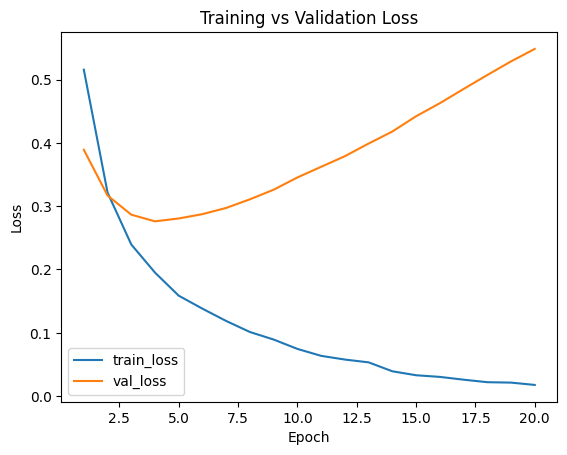

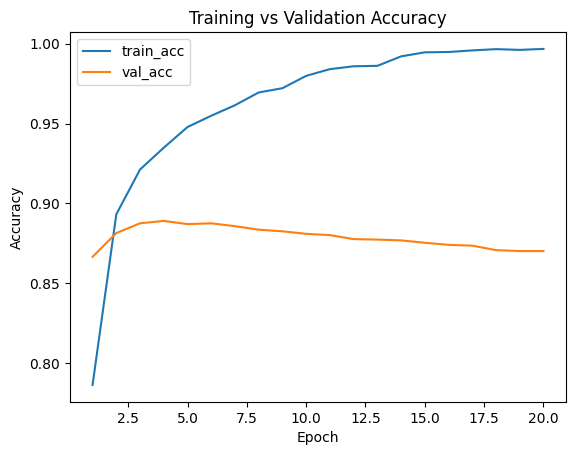

Best epoch (min val_loss): 4


In [10]:
import numpy as np
import matplotlib.pyplot as plt

hist = history.history
epochs = range(1, len(hist["loss"]) + 1)

# Loss
plt.figure()
plt.plot(epochs, hist["loss"], label="train_loss")
plt.plot(epochs, hist["val_loss"], label="val_loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.show()

# Accuracy
plt.figure()
plt.plot(epochs, hist["accuracy"], label="train_acc")
plt.plot(epochs, hist["val_accuracy"], label="val_acc")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend()
plt.show()

# Optimal epoch based on minimum val_loss
best_epoch = int(np.argmin(hist["val_loss"]) + 1)
print(f"Best epoch (min val_loss): {best_epoch}")


In [11]:
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

tf.random.set_seed(42)

def build_model():
    model = keras.Sequential([
        layers.Input(shape=(10000,)),
        layers.Dense(16, activation="relu"),
        layers.Dense(16, activation="relu"),
        layers.Dense(1, activation="sigmoid")
    ])
    model.compile(
        optimizer=keras.optimizers.RMSprop(learning_rate=1e-3),
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )
    return model

best_model = build_model()
best_model.fit(
    partial_x_train,
    partial_y_train,
    epochs=best_epoch,
    batch_size=512,
    validation_data=(x_val, y_val),
    verbose=1
)


Epoch 1/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - accuracy: 0.6883 - loss: 0.6057 - val_accuracy: 0.8528 - val_loss: 0.4216
Epoch 2/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.8902 - loss: 0.3652 - val_accuracy: 0.8778 - val_loss: 0.3292
Epoch 3/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.9180 - loss: 0.2623 - val_accuracy: 0.8849 - val_loss: 0.2928
Epoch 4/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9332 - loss: 0.2071 - val_accuracy: 0.8890 - val_loss: 0.2799


In [14]:
test_loss, test_acc = best_model.evaluate(x_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")


Test Loss: 0.2934
Test Accuracy: 0.8828


5. Analyze Results:

* Compare the training and validation metrics to understand the model’s behavior.
* Report the final accuracy and loss on the test set.


In [15]:
history_dict = history.history
print("Final training loss:", history_dict["loss"][-1])
print("Final validation loss:", history_dict["val_loss"][-1])
print("Final training accuracy:", history_dict["accuracy"][-1])
print("Final validation accuracy:", history_dict["val_accuracy"][-1])


Final training loss: 0.017676442861557007
Final validation loss: 0.5483078956604004
Final training accuracy: 0.9967333078384399
Final validation accuracy: 0.8701000213623047


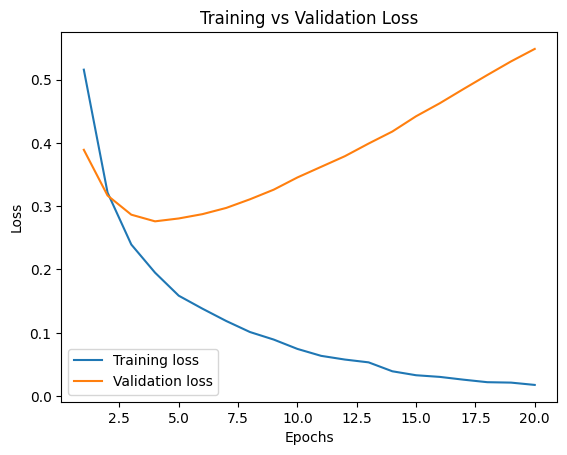

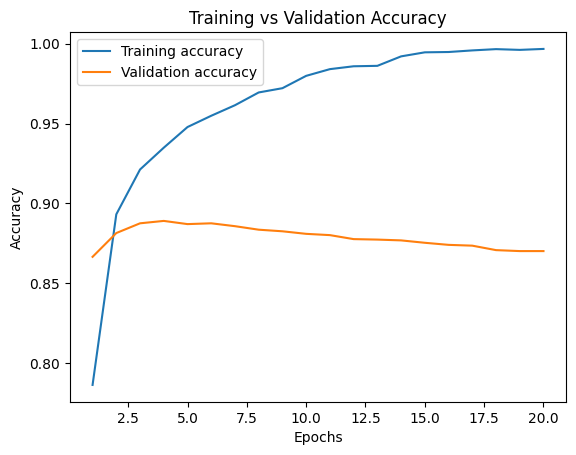

In [16]:
import matplotlib.pyplot as plt

epochs = range(1, len(history_dict["loss"]) + 1)

plt.figure()
plt.plot(epochs, history_dict["loss"], label="Training loss")
plt.plot(epochs, history_dict["val_loss"], label="Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.show()

plt.figure()
plt.plot(epochs, history_dict["accuracy"], label="Training accuracy")
plt.plot(epochs, history_dict["val_accuracy"], label="Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend()
plt.show()
